# 0 Utils

In [434]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
sb.set()
import matplotlib.pyplot as plt
import pandas as pd
import shap


In [435]:
import warnings
warnings.filterwarnings('ignore')

In [436]:
N_JOBS = 6 # -1 ocupa todo los cores
RANDOM_STATE = 42 # para que sea reproducible

## Experiment Setting 

In [437]:
import time
start_time = time.time()


In [438]:
# dataset, base nro 2
dataset_nro = 8
experiment_nro = 1
# 'All Proyects', 'Altos del Valle', 'Edificio Urban 1470','San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'
proyecto_select = 'San Andres Del Valle' #cambiable

# base, base_profesion, base_minusisprofesion, base_medini_isrec
use_predictors = 'no_is_time_price' #cambiable
# experimento 2 y 4 va con True
no_nulls = False #cambiable
sesgo = False #cambiable

In [439]:
predictors_set = dict()

no_is_time_price = [
    'is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut',
    'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente',
    'mean_cot_bod',
    'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
    'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
    'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
    'precio_cotizacion_median', 'precio_cotizacion_std', 
    
    'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
    'tiempo_cotizacion_std',   
    'Altos del Valle',
    'Edificio Urban 1470', 
#     'San Andres Del Valle', 
    'Edificio Mil610',
       'Edificio Junge']
predictors_set ['no_is_time_price'] = no_is_time_price

no_is =[
        'actividad', 
        'loc_comuna', 'loc_provincia', 'loc_region', 'is_descuento', 'is_presencial',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'is_remoto',
       'nro_cot_bod', 'nro_cot_depto', 'valid_rut', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos','is_recontacto',
       'sexo', 'tipo_cliente', 'medio_inicial',  
        'Altos del Valle', 
        'Edificio Urban 1470',
#        'San Andres Del Valle', 
        'Edificio Mil610', 
        'Edificio Junge'
       ]

predictors_set ['no_is'] = no_is

no_is_minus_actividad =[
        'loc_comuna', 'loc_provincia', 'loc_region', 'is_descuento', 'is_presencial',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'is_remoto',
       'nro_cot_bod', 'nro_cot_depto', 'valid_rut', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos','is_recontacto',
       'sexo', 'tipo_cliente', 'medio_inicial',  
        'Altos del Valle', 
        'Edificio Urban 1470',
#        'San Andres Del Valle', 
        'Edificio Mil610', 
        'Edificio Junge'
       ]
predictors_set ['no_is_minus_actividad'] = no_is_minus_actividad


base = ['is_apellido1', 'is_appelido2', 'is_celular',
       'is_direccion', 'is_fnac', 'is_nombre', 'is_nombrecompleto',
       'is_nrofam', 'is_profesion', 'is_telefono',
       'loc_comuna', 'loc_provincia', 'loc_region',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
       'nro_cot_bod', 'nro_cot_depto',
       'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos',
       'sexo', 'tipo_cliente', 
        'Altos del Valle', 
#         'Edificio Urban 1470',
       'San Andres Del Valle', 
        'Edificio Mil610', 
        'Edificio Junge']

print(len(base))
predictors_set ['base'] = base

base_profesion = base[0:]
base_profesion.append('profesion')
print(len(base_profesion))
predictors_set ['base_profesion'] = base_profesion

base_minusisprofesion = base_profesion[0:]
base_minusisprofesion.remove('is_profesion')
print(len(base_minusisprofesion))
predictors_set ['base_minusisprofesion'] = base_minusisprofesion

base_medini_isrec = base_profesion[0:]
base_medini_isrec.append('medio_inicial')
base_medini_isrec.append('is_recontacto')
print(len(base_medini_isrec))
predictors_set ['base_medini_isrec'] = base_medini_isrec


28
29
28
31


# 1 Load Dataset

In [440]:
# nombre experimento
exp_name = "{} {}".format(proyecto_select, use_predictors)
# eleccion dataset
dataset = 'personas_cotizacion{}.csv'.format(dataset_nro)

# DS_NAME = dataset.split('.')[0]
DS_NAME = exp_name

directory = '..\\results\\test_model_results_dataset{}'.format(dataset_nro)
import os
if not os.path.exists(directory):
    os.makedirs(directory)

folder = '..\\results\\model_results_dataset{}\\{}'.format(dataset_nro, DS_NAME)

if not os.path.exists(folder):
    os.mkdir(folder)


personas = pd.read_csv('..\\..\\Datos\\experiments\\{}'.format(dataset), encoding = "ISO-8859-1")

readme = dict()
readme['experiment_name'] = DS_NAME
readme['experiment_dataset'] = dataset

print(personas.shape)
readme['personas_shape'] = personas.shape
# personas.head(2)

print(personas.columns)
readme['personas_columns'] = personas.columns.tolist()

(6155, 47)
Index(['Unnamed: 0', 'actividad', 'compra', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
       'precio_cotizacion_median', 'precio_cotizacion_std', 'rut', 'sexo',
       'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
       'tiempo_cotizacion_std', 'tipo_cliente', 'valid_rut', 'Altos del Valle',
       'Edificio Urban 1470', 'San Andres Del Valle', 'Edificio Mil610',
       'Edificio Junge'],
      dtype='object')


In [441]:
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
# personas.profesion.fillna('sin informacion', inplace=True)
# personas['profesion'] = personas['profesion'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')

In [442]:
# Ajustes especificos experimento
# Para E5D5, E6D5 #########################################
if proyecto_select != 'All Proyects':
    mask = (personas[proyecto_select] > 0)
    personas = personas[mask]
    print(personas[mask].shape)
    personas[mask]
###########################################################

predictors = predictors_set[use_predictors]

if no_nulls:
    personas.replace(['sin informacion'], np.nan, inplace=True)
    personas.dropna(inplace=True)

(3799, 47)


In [443]:
print(predictors)
# Ready Data Set
# p_negocio = personas.negocio # Target
p_negocio = personas.compra # Target
# personas = personas.drop(drop_columns, axis=1) # Predictors
personas = personas[predictors]

print(p_negocio.shape)
print(personas.shape)
readme['personas_after_drop_columns'] = personas.columns

print(personas.shape)
readme['personas_predictors_shape'] = personas.shape
readme['personas_predictors'] = personas.columns


personas = pd.get_dummies(personas)
readme['personas_dummies_shape'] = personas.shape

# personas.describe()

['is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut', 'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente', 'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media', 'precio_cotizacion_median', 'precio_cotizacion_std', 'tiempo_cotizacion_media', 'tiempo_cotizacion_median', 'tiempo_cotizacion_std', 'Altos del Valle', 'Edificio Urban 1470', 'Edificio Mil610', 'Edificio Junge']
(3799,)
(3799, 29)
(3799, 29)


# 3 Supervised Learning: Classification

## 3.1 Libraries

In [478]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import svm
from xgboost import XGBClassifier

## 3.2 Check the Dataset

In [479]:
print("Tamaño Total: ", personas.shape)
print("Personas que hicieron Negocio: ", p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ", p_negocio[p_negocio == False].shape)
readme['personas_negocio'] = p_negocio[p_negocio == True].shape
readme['personas_nonegocio'] = p_negocio[p_negocio == False].shape

Tamaño Total:  (3799, 55)
Personas que hicieron Negocio:  (235,)
Personas que no Hicieorn Negocio:  (3564,)


## 3.4 Help Functions

In [480]:
readme['model'] = dict()

In [481]:
roc_curves_to_plot= dict()

In [482]:
roc_curves_to_plot[DS_NAME]= dict()

In [483]:
import scikitplot as skplt

def classifier_insights(y_test, clf_probas, MODEL):
    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_cumulative_gain(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_cum_gain.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()


    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_lift_curve(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_lift.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.estimators.plot_feature_importances(
        best_brf, feature_names=personas.columns, x_tick_rotation=90, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_f_importance.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()



    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_precision_recall(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}\\{}\\{}_precition_recall.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_ks_statistic(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_ks_sta.png'.format(dataset_nro, DS_NAME, MODEL), bbox_inches = 'tight', dpi=300)
    plt.show()

In [484]:
import json
def save_readme():    
    exDict = {'readme': readme}
    with open('..\\results\\model_results_dataset{}\\{}\\readme_{}.txt'.format(dataset_nro, DS_NAME, DS_NAME), 'w') as file:
        file.write(str(exDict))

def plot_all_auc_values():
        
    d = dict()
    for key in roc_curves_to_plot[DS_NAME]:
        d[key] = roc_curves_to_plot[DS_NAME][key]['auc']
    
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    
    x_model = [x[0] for x in s]
    x_value = [x[1] for x in s]
    
    x = np.arange(len(roc_curves_to_plot[DS_NAME].keys()))
    
    f = plt.figure(figsize=(12,8))
    plt.title('{} AUC Models'.format(DS_NAME))
    plt.xlabel('Models')
    plt.ylabel('AUC')
    plt.bar(x, x_value)
    plt.xticks(x, x_model)
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\auc_models.png'.format(dataset_nro, DS_NAME,DS_NAME), dpi=300)
    plt.show()

def plot_all_roc_curves():
    
    f = plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    for key in roc_curves_to_plot[DS_NAME]:
        plt.plot(roc_curves_to_plot[DS_NAME][key]['fpr'], roc_curves_to_plot[DS_NAME][key]['tpr']) #fpr and tpr
    
    legends = ['random choice']
    legends.extend(roc_curves_to_plot[DS_NAME].keys())
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\roc_curve_all.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

# Import necessary modules
def roc_curve_plot(model, X_test, y_test):
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)
    
    roc_curves_to_plot[DS_NAME][MODEL] = dict()
    roc_curves_to_plot[DS_NAME][MODEL]['fpr'] = fpr
    roc_curves_to_plot[DS_NAME][MODEL]['tpr'] = tpr
    roc_curves_to_plot[DS_NAME][MODEL]['auc'] = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} {} ROC Curve'.format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_roc_curve.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

def plot_confusion_matrix(y, y_pred):
    conf_ma = confusion_matrix(y, y_pred)
    clas_report = classification_report(y, y_pred)
    
    print("Confusion Matrix: \n", conf_ma)
    readme['model'][MODEL]['conf_matrix'] = conf_ma
    
    print("Clasification Reports:\n", clas_report)
    readme['model'][MODEL]['cla_report'] = clas_report
    
    plt.figure(figsize=(5,5))
    
    sb.heatmap(conf_ma, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    title_plt = "{} {} Conf. Matrix".format(DS_NAME, MODEL)
    plt.title(title_plt, size=10);
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_confusion_matrix.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.best_estimator_.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance[:20]))
    bar_width = 0.5
    rects = plt.barh(index[:20] , df_f["importance"][:20], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.title("{} {} Feature Importance".format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_importance.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

def grid_results(grid):
    
    best_model = grid.best_estimator_
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    p, r, f, s = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    grid_mean_test_score = pd.DataFrame(grid.cv_results_)
    grid_mean_test_score = grid_mean_test_score.sort_values(by='rank_test_score')
    grid_mean_test_score = grid_mean_test_score.reset_index().loc[0,['std_test_score']]
    
    return {
        'grid_best_model': grid.best_estimator_,
        'grid_std': grid_mean_test_score,
        'grid_best_score': grid.best_score_,
        'grid_cvresults': grid.cv_results_,
        'best_model_test_score':best_model.score(X_test, y_test),
        'best_model_test_ypred': best_model.predict_proba(X_test)[:,1],
        'best_model_test_auc': roc_auc_score(y_test, y_pred),
        'best_model_precision': p,
        'best_model_recall': r,
        'best_model_fscore': f,
        'best_model_support': s,
    }

## 3.5 Models

In [485]:
to_profit_curve = dict()

## 3.3 Train & Test

In [486]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
readme['x_train_shape'] = X_train.shape
readme['y_train_shape'] = y_train.shape
readme['x_test_shape'] = X_test.shape
readme['y_test_shape'] = y_test.shape

(2659, 55) (1140, 55) (2659,) (1140,)


In [508]:
clf_params = dict()
clf_params['KNN'] = {'n_neighbors': np.arange(1, 20)}
clf_params['PCAKNN'] = {'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9]}
clf_params['LR'] = {'C': np.logspace(-5, 8, 15), 'penalty':['l1', 'l2'], 'class_weight':[None, 'balanced']}
clf_params['DT'] = {"max_depth": range(1,20),"max_features":range(1,30), 
                    "min_samples_leaf": range(1,10),"criterion": ["gini", "entropy"], 
                    'class_weight':[None, 'balanced']}
clf_params['RF'] = {"max_depth": range(1,20),"max_features":range(1,30), "min_samples_leaf": range(1,10),
                    "criterion": ["gini", "entropy"], 'class_weight':[None, 'balanced']}
#SVM PARAMS
clf_params['SVM'] = {'C' :[0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1], 'class_weight':[None, 'balanced']}
# XGB PARAMS
clf_params['XGB'] = {'n_estimators' : [50, 100, 150, 200], 'max_depth' : [2, 4, 6, 8]}

In [509]:
clfs = dict()
clfs['LR'] = LogisticRegression()
clfs['DT'] = DecisionTreeClassifier()
clfs['RF'] = RandomForestClassifier()
clfs['SVM'] = svm.SVC(kernel='rbf', probability=True)
clfs['KNN'] = KNeighborsClassifier()
clfs['PCAKNN'] = Pipeline([('pca', PCA()), ('clf', KNeighborsClassifier())])
clfs['XGB'] = XGBClassifier()

In [510]:
clfs_results = dict()
clfs_results['LR'] = dict()
clfs_results['DT'] = dict()
clfs_results['RF'] = dict()
clfs_results['PCAKNN'] = dict()
clfs_results['KNN'] = dict()
clfs_results['XGB'] = dict()
clfs_results['SVM'] = dict()


# Grid

In [511]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

for clf in clfs.keys():
    print("Classifier:",clf)
    for i in range(2,3):

        kf = StratifiedKFold(n_splits=i, shuffle=True, random_state=RANDOM_STATE)

        if clf == 'RF':
            grid = RandomizedSearchCV(clfs[clf], clf_params[clf], cv=kf, 
                                      n_jobs=N_JOBS, n_iter=300, random_state=RANDOM_STATE, verbose=1)
        else:
            grid = GridSearchCV(clfs[clf], clf_params[clf], cv=kf, 
                                n_jobs=N_JOBS, verbose=1, random_state=RANDOM_STATE)
        
        grid.fit(X, y)

        clfs_results[clf][i] = grid_results(grid)
        print(
            "grid_acc cv={} %.4f +- %.3f |".format(i) % (clfs_results[clf][i]['grid_best_score']
                                                             ,clfs_results[clf][i]['grid_std']), 
            "model_auc: %.4f |" % clfs_results[clf][i]['best_model_test_auc'],
            "model_acc: %.4f |" % clfs_results[clf][i]['best_model_test_score'],
            "model_p: %.4f |" % clfs_results[clf][i]['best_model_precision'],
            "model_r: %.4f |" % clfs_results[clf][i]['best_model_recall'],
            "model_fs: %.4f" % clfs_results[clf][i]['best_model_fscore'],
            
             )
    

Classifier: XGB
grid_acc cv=2 0.9376 +- 0.001 | model_auc: 0.4995 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874


In [419]:
for clf in clfs_results.keys():
    print("Classifier: ", clf)
    for cv in clfs_results[clf].keys():
                print(
            "grid_acc cv={} %.4f +- %.3f |".format(cv) % (clfs_results[clf][cv]['grid_best_score']
                                                             ,clfs_results[clf][cv]['grid_std']), 
            "model_auc: %.4f |" % clfs_results[clf][cv]['best_model_test_auc'],
            "model_acc: %.4f |" % clfs_results[clf][cv]['best_model_test_score'],
            "model_p: %.4f |" % clfs_results[clf][cv]['best_model_precision'],
            "model_r: %.4f |" % clfs_results[clf][cv]['best_model_recall'],
            "model_fs: %.4f" % clfs_results[clf][cv]['best_model_fscore'],
            
             )

Classifier:  lr
grid_acc cv=2 0.8342 +- 0.003 | model_auc: 0.6811 | model_acc: 0.8439 | model_p: 0.7706 | model_r: 0.6811 | model_fs: 0.7090
grid_acc cv=3 0.8355 +- 0.002 | model_auc: 0.6833 | model_acc: 0.8500 | model_p: 0.7903 | model_r: 0.6833 | model_fs: 0.7147
grid_acc cv=4 0.8365 +- 0.003 | model_auc: 0.6833 | model_acc: 0.8500 | model_p: 0.7903 | model_r: 0.6833 | model_fs: 0.7147
grid_acc cv=5 0.8360 +- 0.006 | model_auc: 0.6739 | model_acc: 0.8456 | model_p: 0.7812 | model_r: 0.6739 | model_fs: 0.7044
grid_acc cv=6 0.8392 +- 0.002 | model_auc: 0.6833 | model_acc: 0.8500 | model_p: 0.7903 | model_r: 0.6833 | model_fs: 0.7147
grid_acc cv=7 0.8357 +- 0.006 | model_auc: 0.6833 | model_acc: 0.8500 | model_p: 0.7903 | model_r: 0.6833 | model_fs: 0.7147
grid_acc cv=8 0.8365 +- 0.004 | model_auc: 0.6833 | model_acc: 0.8500 | model_p: 0.7903 | model_r: 0.6833 | model_fs: 0.7147
grid_acc cv=9 0.8371 +- 0.007 | model_auc: 0.6833 | model_acc: 0.8500 | model_p: 0.7903 | model_r: 0.6833 | m

In [ ]:
pd.DataFrame(clfs_results['lr'][2]['grid_cvresults'])

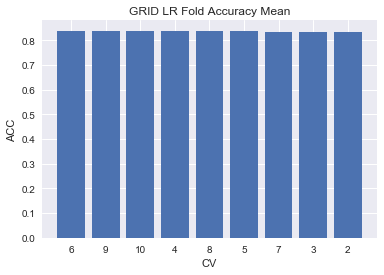

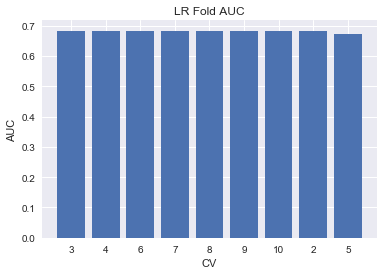

In [427]:
def bar_results(rd, model_name, metric, xlabel, ylabel, title):
    d = dict()

    for result in rd[model_name].keys():
        d[result] = rd[model_name][result][metric]

    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

    x_model = [x[0] for x in s]
    x_value = [x[1] for x in s]

    x = np.arange(len(clfs_results[model_name].keys()))

    f = plt.figure(figsize=(6,4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(x, x_value)
    plt.xticks(x, x_model)
    plt.show()
    
bar_results(clfs_results, 'lr', 'grid_best_score', 'CV', 'ACC', 'GRID LR Fold Accuracy Mean')
bar_results(clfs_results, 'lr', 'best_model_test_auc', 'CV', 'AUC', 'LR Fold AUC')

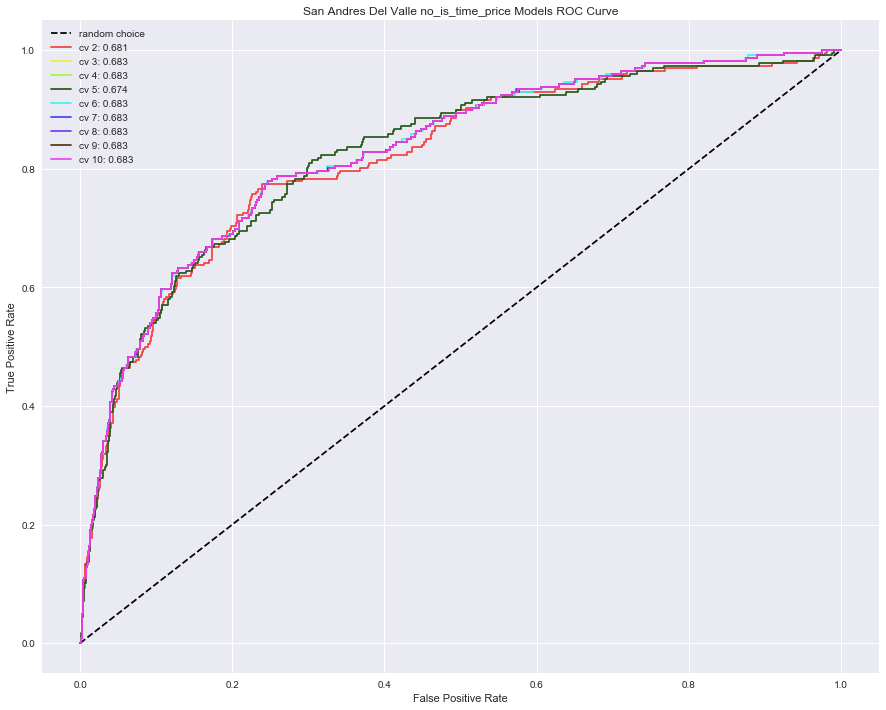

In [430]:
color_sequence = ['#f44242', '#f4eb41', '#acf441', '#285919', '#41f4eb',
                  '#4146f4', '#7041f4', '#593518', '#f441f1', '#f44173']

def roc_battle(clf):
    
    f = plt.figure(figsize=(15,12))
    plt.plot([0, 1], [0, 1], 'k--')
    rank= 0
    legends = ['random choice']
    for key, value in clfs_results[clf].items():
        legends.append('cv %i: %.3f' %(key, clfs_results[clf][key]['best_model_test_auc']))
        y_pred = clfs_results[clf][key]['best_model_test_ypred']
        fpr, tpr, treshold = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, color=color_sequence[rank]) #fpr and tpr
        rank +=1
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_battle_roc_curve.png'.format(dataset_nro, DS_NAME, clf), dpi=300)
    plt.show()

roc_battle('lr')